# NAME: AMANULLAH **KHAN**

# **TASK#1**

In [6]:
# bfs and  dfs on graph
from collections import deque

graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': [],
    'F': [],
}

def bfs(start):
  visited = []
  q = deque([start])
  seen = {start}  # Use a set for efficient lookups
  while q:
    node = q.popleft()
    visited.append(node)
    for neighbour in graph.get(node, []): # Use .get() to handle nodes with no neighbors
      if neighbour not in seen:
        seen.add(neighbour)
        q.append(neighbour)
  return visited

def dfs(start):
    visited = []
    seen = set()
    def dfs_rec(n):
      seen.add(n)
      visited.append(n)
      for neighbour in graph.get(n, []): # Use .get() to handle nodes with no neighbors
        if neighbour not in seen:
          dfs_rec(neighbour)
    dfs_rec(start)
    return visited

print("BFS from A:", bfs('A'))
print("DFS from A:", dfs('A'))

BFS from A: ['A', 'B', 'C', 'D', 'E', 'F']
DFS from A: ['A', 'B', 'D', 'E', 'C', 'F']


# **TASK2**

In [7]:
# Task 2: Student dictionary operations
# Paste this into one code cell and run

student = {
    "name": "Amanullah Khan",
    "age": 21,
    "roll_number": "BSSE-2025-101",
    "grade": "B"
}

# 1. Print all keys and values
print("All items:")
for k, v in student.items():
    print(f"  {k}: {v}")

# 2. Update the grade of the student
student["grade"] = "A"
print("\nAfter updating grade:")
print(student)

# 3. Add a new key email with a value
student["email"] = "aman@example.com"
print("\nAfter adding email:")
print(student)

# 4. Delete the roll_number key
del student["roll_number"]
print("\nAfter deleting roll_number:")
print(student)


All items:
  name: Amanullah Khan
  age: 21
  roll_number: BSSE-2025-101
  grade: B

After updating grade:
{'name': 'Amanullah Khan', 'age': 21, 'roll_number': 'BSSE-2025-101', 'grade': 'A'}

After adding email:
{'name': 'Amanullah Khan', 'age': 21, 'roll_number': 'BSSE-2025-101', 'grade': 'A', 'email': 'aman@example.com'}

After deleting roll_number:
{'name': 'Amanullah Khan', 'age': 21, 'grade': 'A', 'email': 'aman@example.com'}


# TASK#**3**

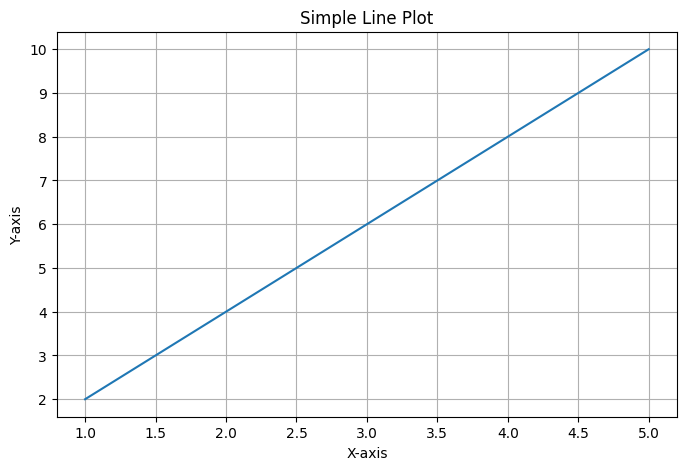

In [8]:
# Task 3: Simple line plot using matplotlib
# In Colab you may need to run: !pip install matplotlib  (usually preinstalled)

import matplotlib.pyplot as plt

X = [1, 2, 3, 4, 5]
Y = [2, 4, 6, 8, 10]

plt.figure(figsize=(8,5))
plt.plot(X, Y)                 # simple line plot
plt.title("Simple Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()


# *Task #5*

In [9]:
import time, tracemalloc
from collections import deque

def water_moves(state, cap1=4, cap2=3):
    x, y = state
    moves = []
    # fill jug1
    moves.append((cap1, y))
    # fill jug2
    moves.append((x, cap2))
    # empty jug1
    moves.append((0, y))
    # empty jug2
    moves.append((x, 0))
    # pour jug1 -> jug2
    transfer = min(x, cap2 - y)
    moves.append((x - transfer, y + transfer))
    # pour jug2 -> jug1
    transfer = min(y, cap1 - x)
    moves.append((x + transfer, y - transfer))
    # return unique valid moves
    return list(set(moves))

def bfs_water(start, goal):
    t0 = time.time()
    tracemalloc.start()
    q = deque([(start, [start])])
    seen = {start}
    nodes = 0
    while q:
        state, path = q.popleft()
        nodes += 1
        if goal in state:
            mem_current, mem_peak = tracemalloc.get_traced_memory()
            tracemalloc.stop()
            return {"path": path, "steps": len(path)-1, "nodes_expanded": nodes,
                    "time": time.time()-t0, "memory_bytes": mem_peak}
        for mv in water_moves(state):
            if mv not in seen:
                seen.add(mv)
                q.append((mv, path + [mv]))
    tracemalloc.stop()
    return None

res = bfs_water((0,0), 2)  # example: find any state with 2 liters in any jug
print(res)


{'path': [(0, 0), (0, 3), (3, 0), (3, 3), (4, 2)], 'steps': 4, 'nodes_expanded': 10, 'time': 0.0004210472106933594, 'memory_bytes': 2976}


# TASK **6**

A* Path found:
[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4), (4, 5)]


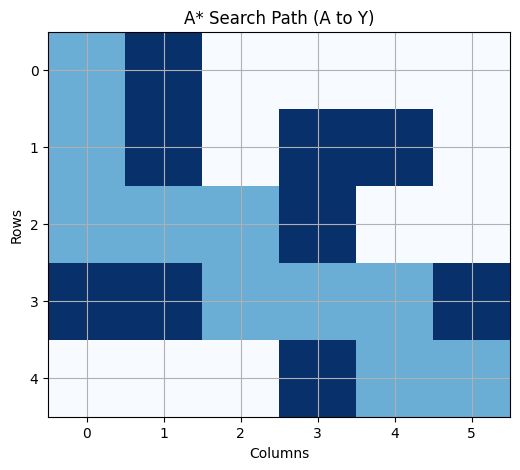

In [10]:
# ======================================================
# TASK #6 — A* Search on a Maze
# COMSATS University Islamabad - Abbottabad Campus
# Course: Artificial Intelligence
# Student: Amanullah Khan | Roll No: BSSE-2025-101
# ======================================================

import heapq
import matplotlib.pyplot as plt

# 1️⃣ Define the maze
# 0 = empty path
# 1 = wall
# A = start (row=0,col=0)
# Y = goal  (row=4,col=5)
maze = [
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 0],
    [1, 1, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 0]
]

start = (0, 0)  # A
goal = (4, 5)   # Y
rows, cols = len(maze), len(maze[0])

# 2️⃣ Define heuristic (Manhattan distance)
def heuristic(a, b):
    (x1, y1), (x2, y2) = a, b
    return abs(x1 - x2) + abs(y1 - y2)

# 3️⃣ Get valid neighbors (4 directions)
def neighbors(node):
    x, y = node
    moves = [(1,0), (-1,0), (0,1), (0,-1)]
    result = []
    for dx, dy in moves:
        nx, ny = x + dx, y + dy
        if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0:
            result.append((nx, ny))
    return result

# 4️⃣ Implement A* algorithm
def a_star(start, goal):
    open_list = []
    heapq.heappush(open_list, (0 + heuristic(start, goal), 0, start, [start]))
    visited = set()

    while open_list:
        f, g, node, path = heapq.heappop(open_list)
        if node == goal:
            return path
        if node in visited:
            continue
        visited.add(node)

        for n in neighbors(node):
            if n not in visited:
                new_g = g + 1
                new_f = new_g + heuristic(n, goal)
                heapq.heappush(open_list, (new_f, new_g, n, path + [n]))
    return None

# 5️⃣ Run A* and display result
path = a_star(start, goal)
print("A* Path found:" if path else "No path found!")
print(path)

# 6️⃣ Visualize the maze and path
def show_maze(maze, path):
    plt.figure(figsize=(6,5))
    maze_display = [[1 if cell==1 else 0 for cell in row] for row in maze]
    for (x, y) in path:
        maze_display[x][y] = 0.5  # mark path as gray
    plt.imshow(maze_display, cmap="Blues")
    plt.title("A* Search Path (A to Y)")
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.grid(True)
    plt.show()

if path:
    show_maze(maze, path)
